In [24]:
import numpy as np
from sklearn.metrics import r2_score

class LogisticRegression:
    
    def __init__(self):
        """初始化Linear Regression模型"""
        self.coef_ = None
        self.interception_ = None
        self._theta = None
    
    def _sigmoid(self, t):
            return 1. / (1. + np.exp(-t))
        
    def fit(self, X_train, y_train, eta=0.01, n_iters = 1e4):
        """根据训练数据集X_train, y_train，使用梯度下降法训练Linear Regression模型"""
        assert X_train.shape[0] == y_train.shape[0], "the size of X_train must be equal to the size of y_train"
        

        
        def J(theta, X_b, y):
            y_hat = self._sigmoid(X_b.dot(theta))
            try:
                return np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
            except:
                return float('inf')
            
        def dJ(theta, X_b, y):
            return X_b.T.dot(self._sigmoid(X_b.dot(theta))-y) / len(X_b)
        
        def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
            theta = initial_theta
            i_iter = 0
            while i_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - eta * gradient
                if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
                    break
                i_iter += 1
            return theta
        
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, eta)
        self.interception_ = self._theta[0]
        self.coef_ = self._theta[1:]
        return self
        
    def predict_proba(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.interception_ is not None and self.coef_ is not None, "must fit before predict"
        assert X_predict.shape[1] == len(self.coef_), "the feature number of X_predict must equal to X_train"
        
        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return self._sigmoid(X_b.dot(self._theta))
    
    def predict(self, X_predict):
        """给定待预测数据集X_predict，返回表示X_predict的结果向量"""
        assert self.interception_ is not None and self.coef_ is not None, "must fit before predict"
        assert X_predict.shape[1] == len(self.coef_), "the feature number of X_predict must equal to X_train"
        
        proba = self.predict_proba(X_predict)
        return np.array(proba>=0.5, dtype=int)
    
    def score(self, X_test, y_test):
        """根据测试数据集X_test, y_test确定当前模型的准确度"""
        
        y_predict = self.predict(X_test)
        return r2_score(y_test, y_predict)
        
    def __repr__(self):
        return "LogisticRegression()"

### 实现逻辑回归

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [18]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X = X[y<2, :2]  # 逻辑回归只能解决二分类问题，因此只选取其中两种花的数据
y = y[y<2]

In [19]:
X.shape

(100, 2)

In [20]:
y.shape

(100,)

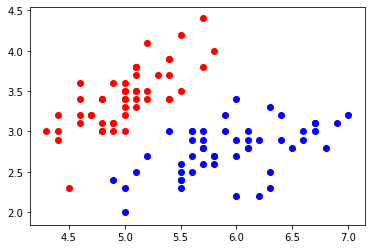

In [21]:
plt.scatter(X[y==0,0],X[y==0,1], color='red')
plt.scatter(X[y==1,0],X[y==1,1], color='blue')
plt.show()

### 使用逻辑回归

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [25]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [26]:
log_reg.score(X_test, y_test)

1.0

In [27]:
log_reg.predict_proba(X_test)

array([0.93292947, 0.98717455, 0.15541379, 0.01786837, 0.03909442,
       0.01972689, 0.05214631, 0.99683149, 0.98092348, 0.75469962,
       0.0473811 , 0.00362352, 0.27122595, 0.03909442, 0.84902103,
       0.80627393, 0.83574223, 0.33477608, 0.06921637, 0.21582553,
       0.0240109 , 0.1836441 , 0.98092348, 0.98947619, 0.08342411])

In [28]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

In [29]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0])

# 决策边界

In [30]:
log_reg.coef_

array([ 3.01749692, -5.03046934])

In [31]:
log_reg.interception_

-0.6827383698993108

In [32]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.interception_) / log_reg.coef_[1]

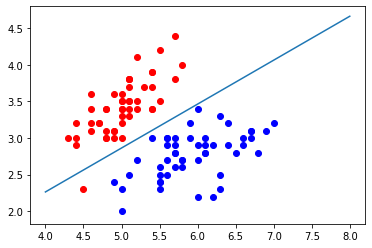

In [33]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

plt.plot(x1_plot, x2_plot)
plt.scatter(X[y==0,0],X[y==0,1], color='red')
plt.scatter(X[y==1,0],X[y==1,1], color='blue')
plt.show()

In [61]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

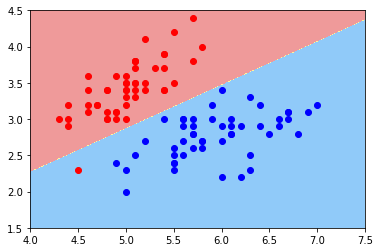

In [62]:
plot_decision_boundary(log_reg, axis=[4,7.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1], color='red')
plt.scatter(X[y==1,0],X[y==1,1], color='blue')
plt.show()

### KNN的决策边界

KNN方法的决策边界没有表达式，但仍可以绘制出决策边界

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
knn_clf.score(X_test, y_test)

1.0

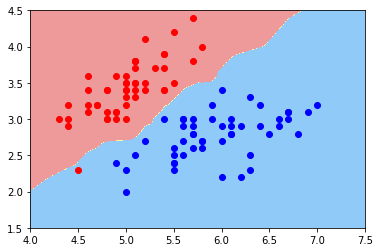

In [66]:
plot_decision_boundary(knn_clf, axis=[4,7.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1], color='red')
plt.scatter(X[y==1,0],X[y==1,1], color='blue')
plt.show()

In [68]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

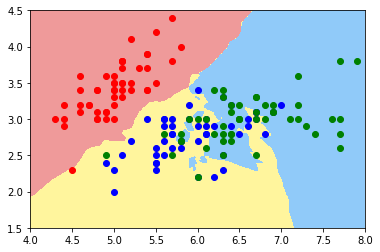

In [71]:
plot_decision_boundary(knn_clf_all, axis=[4,8,1.5,4.5])
plt.scatter(iris.data[iris.target==0,0],iris.data[iris.target==0,1], color='red')
plt.scatter(iris.data[iris.target==1,0],iris.data[iris.target==1,1], color='blue')
plt.scatter(iris.data[iris.target==2,0],iris.data[iris.target==2,1], color='green')
plt.show()

黄色与蓝色之间的边界存在过拟合

In [72]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

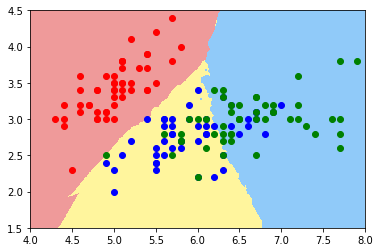

In [73]:
plot_decision_boundary(knn_clf_all, axis=[4,8,1.5,4.5])
plt.scatter(iris.data[iris.target==0,0],iris.data[iris.target==0,1], color='red')
plt.scatter(iris.data[iris.target==1,0],iris.data[iris.target==1,1], color='blue')
plt.scatter(iris.data[iris.target==2,0],iris.data[iris.target==2,1], color='green')
plt.show()

k值越大，模型越简单